In [132]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

%matplotlib inline
#%load_ext cudf.pandas
#supercharges workflow with GPU acceleration using cudf.pandas
#Im having pip install issues with cudf so commenting it out for now

In [ ]:
pandas_df = pd.read_csv(r'C:\Users\admin\OneDrive\Documents\GitHub\Plotting\fifa_dataset\FIFA23_official_data.csv')
pandas_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


In [ ]:
#Diff between 17, 18 and 19 is that 18,19 have an extra column called 'Release Clause'
#20, 21, and 22 have an extra column called 'Defensive Awareness'
#23 has literally 29 columns only out of potential 65 columns
#So 23 is missing a lot of columns compared to previous years

## DATA STRUCTURE/SHAPE/INFO

In [135]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

In [136]:
pandas_df.shape

(17660, 29)

In [137]:
pandas_df.dtypes

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Release Clause               object
Kit Number                  

In [ ]:
import polars as pl
polars_df = pl.read_csv(r'C:\Users\admin\OneDrive\Documents\GitHub\Plotting\fifa_dataset\FIFA23_official_data.csv')

In [139]:
polars_df.head(10)

ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
i64,str,i64,str,str,str,i64,i64,str,str,str,str,i64,str,f64,f64,f64,str,str,str,str,str,str,str,str,str,str,f64,str
209658,"""L. Goretzka""",27,"""https://cdn.sofifa.net/players…","""Germany""","""https://cdn.sofifa.net/flags/d…",87,88,"""FC Bayern München""","""https://cdn.sofifa.net/teams/2…","""€91M""","""€115K""",2312,"""Right""",4.0,4.0,3.0,"""High/ Medium""","""Unique""","""Yes""","""<span class=""pos pos28"">SUB""","""Jul 1, 2018""","""nan""","""2026""","""189cm""","""82kg""","""€157M""",8.0,"""nan"""
212198,"""Bruno Fernandes""",27,"""https://cdn.sofifa.net/players…","""Portugal""","""https://cdn.sofifa.net/flags/p…",86,87,"""Manchester United""","""https://cdn.sofifa.net/teams/1…","""€78.5M""","""€190K""",2305,"""Right""",3.0,3.0,4.0,"""High/ High""","""Unique""","""Yes""","""<span class=""pos pos15"">LCM""","""Jan 30, 2020""","""nan""","""2026""","""179cm""","""69kg""","""€155M""",8.0,"""nan"""
224334,"""M. Acuña""",30,"""https://cdn.sofifa.net/players…","""Argentina""","""https://cdn.sofifa.net/flags/a…",85,85,"""Sevilla FC""","""https://cdn.sofifa.net/teams/4…","""€46.5M""","""€46K""",2303,"""Left""",2.0,3.0,3.0,"""High/ High""","""Stocky (170-185)""","""No""","""<span class=""pos pos7"">LB""","""Sep 14, 2020""","""nan""","""2024""","""172cm""","""69kg""","""€97.7M""",19.0,"""nan"""
192985,"""K. De Bruyne""",31,"""https://cdn.sofifa.net/players…","""Belgium""","""https://cdn.sofifa.net/flags/b…",91,91,"""Manchester City""","""https://cdn.sofifa.net/teams/1…","""€107.5M""","""€350K""",2303,"""Right""",4.0,5.0,4.0,"""High/ High""","""Unique""","""Yes""","""<span class=""pos pos13"">RCM""","""Aug 30, 2015""","""nan""","""2025""","""181cm""","""70kg""","""€198.9M""",17.0,"""nan"""
224232,"""N. Barella""",25,"""https://cdn.sofifa.net/players…","""Italy""","""https://cdn.sofifa.net/flags/i…",86,89,"""Inter""","""https://cdn.sofifa.net/teams/4…","""€89.5M""","""€110K""",2296,"""Right""",3.0,3.0,3.0,"""High/ High""","""Normal (170-)""","""Yes""","""<span class=""pos pos13"">RCM""","""Sep 1, 2020""","""nan""","""2026""","""172cm""","""68kg""","""€154.4M""",23.0,"""nan"""
212622,"""J. Kimmich""",27,"""https://cdn.sofifa.net/players…","""Germany""","""https://cdn.sofifa.net/flags/d…",89,90,"""FC Bayern München""","""https://cdn.sofifa.net/teams/2…","""€105.5M""","""€130K""",2283,"""Right""",4.0,4.0,3.0,"""High/ Medium""","""Normal (170-185)""","""Yes""","""<span class=""pos pos9"">RDM""","""Jul 1, 2015""","""nan""","""2025""","""177cm""","""75kg""","""€182M""",6.0,"""nan"""
197445,"""D. Alaba""",30,"""https://cdn.sofifa.net/players…","""Austria""","""https://cdn.sofifa.net/flags/a…",86,86,"""Real Madrid CF""","""https://cdn.sofifa.net/teams/2…","""€55.5M""","""€220K""",2277,"""Left""",4.0,4.0,3.0,"""Medium/ Medium""","""Normal (170-185)""","""Yes""","""<span class=""pos pos6"">LCB""","""Jul 1, 2021""","""nan""","""2026""","""180cm""","""78kg""","""€113.8M""",4.0,"""nan"""
187961,"""22 Paulinho""",32,"""https://cdn.sofifa.net/players…","""Brazil""","""https://cdn.sofifa.net/flags/b…",83,83,"""Al Ahli""","""https://cdn.sofifa.net/teams/1…","""€28.5M""","""€61K""",2273,"""Right""",3.0,4.0,4.0,"""High/ High""","""Normal (170-185)""","""Yes""","""<span class=""pos pos15"">LCM""","""Jul 22, 2021""","""nan""","""2024""","""183cm""","""80kg""","""€48.5M""",15.0,"""nan"""
208333,"""E. Can""",28,"""https://cdn.sofifa.net/players…","""Germany""","""https://cdn.sofifa.net/flags/d…",82,82,"""Borussia Dortmund""","""https://cdn.sofifa.net/teams/2…","""€30.5M""","""€63K""",2271,"""Right""",3.0,4.0,3.0,"""Medium/ High""","""Stocky (185+)""","""Yes""","""<span class=""pos pos28"">SUB""","""Feb 18, 2020""","""nan""","""2024""","""186cm""","""86kg""","""€51.9M""

In [140]:
polars_df.shape

(17660, 29)

In [141]:
polars_df.dtypes

[Int64,
 String,
 Int64,
 String,
 String,
 String,
 Int64,
 Int64,
 String,
 String,
 String,
 String,
 Int64,
 String,
 Float64,
 Float64,
 Float64,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 Float64,
 String]

In [142]:
from skimpy import skim
skim(pandas_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17660  │ │ string      │ 20    │                                                          │
│ │ Number of columns │ 29     │ │ int64       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 4     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column          ┃ NA ┃ NA %           ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID              │  0 │              0 │ 246300 │  31490 │  16 │ 240700 │ 257000 │ 263000 │ 271300 │     ▁▇ │  │
│ │ Age             │  0 │              0 │  23.13 │   4.64 │  15 │     20 │     22 │     26 │     54 │  ▇▆▃   │  │
│ │ Overall         │  0 │              0 │  63.37 │  8.036 │  43 │     58 │     63 │     69 │     91 │ ▁▅▇▅▂  │  │
│ │ Potential       │  0 │              0 │  70.98 │   6.53 │  42 │     67 │     71 │     75 │     95 │  ▁▅▇▃  │  │
│ │ Special         │  0 │              0 │   1538 │  285.9 │ 749 │   1387 │   1548 │   1727 │   2312 │ ▂▂▇▇▃▁ │  │
│ │ International   │  0 │              0 │  1.106 │  0.407 │   1 │      1 │      1 │      1 │      5 │   ▇    │  │
│ │ Reputation      │    │                │        │        │     │        │        │        │        │        │  │
│ │ Weak Foot       │  0 │              0 │    2.9 │ 0.6635 │   1 │      3 │      3 │      3 │      5 │  ▃ ▇▂  │  │
│ │ Skill Moves     │  0 │              0 │  2.297 │ 0.7543 │   1 │      2 │      2 │      3 │      5 │ ▂▇ ▅▁  │  │
│ │ Kit Number      │ 35 │ 0.198187995469 │  25.04 │  19.15 │   1 │     11 │     22 │     32 │     99 │ ▇▇▃▁ ▁ │  │
│ │                 │    │          98866 │        │        │     │        │        │        │        │        │  │
│ └─────────────────┴────┴────────────────┴────────┴────────┴─────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃          ┃       ┃          ┃          ┃          ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column   ┃ NA    ┃ NA %     ┃ shortest ┃ longest  ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Name     │     0 │        0 │ Isi      │ 22 L.    │ 07 C.    │ Ș.        │     11.2 │         2 │    35532 │  │
│ │          │       │          │          │ Urbano   │ Mengi    │ Tomache   │          │           │          │  │
│ │          │       │          │          │ Dias de  │          │           │          │           │          │  │
│ │          │       │          │          │ Lima     │          │           │          │           │          │  │
│ │ Photo    │     0 │        0 │ https:// │ https:// │ 

In [143]:
#skimpy supports polars dataframes as well
skim(polars_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17660  │ │ string      │ 20    │                                                          │
│ │ Number of columns │ 29     │ │ int64       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 4     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column          ┃ NA ┃ NA %           ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID              │  0 │              0 │ 246300 │  31490 │  16 │ 240700 │ 257000 │ 263000 │ 271300 │     ▁▇ │  │
│ │ Age             │  0 │              0 │  23.13 │   4.64 │  15 │     20 │     22 │     26 │     54 │  ▇▆▃   │  │
│ │ Overall         │  0 │              0 │  63.37 │  8.036 │  43 │     58 │     63 │     69 │     91 │ ▁▅▇▅▂  │  │
│ │ Potential       │  0 │              0 │  70.98 │   6.53 │  42 │     67 │     71 │     75 │     95 │  ▁▅▇▃  │  │
│ │ Special         │  0 │              0 │   1538 │  285.9 │ 749 │   1387 │   1548 │   1727 │   2312 │ ▂▂▇▇▃▁ │  │
│ │ International   │  0 │              0 │  1.106 │  0.407 │   1 │      1 │      1 │      1 │      5 │   ▇    │  │
│ │ Reputation      │    │                │        │        │     │        │        │        │        │        │  │
│ │ Weak Foot       │  0 │              0 │    2.9 │ 0.6635 │   1 │      3 │      3 │      3 │      5 │  ▃ ▇▂  │  │
│ │ Skill Moves     │  0 │              0 │  2.297 │ 0.7543 │   1 │      2 │      2 │      3 │      5 │ ▂▇ ▅▁  │  │
│ │ Kit Number      │ 35 │ 0.198187995469 │  25.04 │  19.15 │   1 │     11 │     22 │     32 │     99 │ ▇▇▃▁ ▁ │  │
│ │                 │    │          98866 │        │        │     │        │        │        │        │        │  │
│ └─────────────────┴────┴────────────────┴────────┴────────┴─────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃          ┃     ┃           ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column   ┃ NA  ┃ NA %      ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━╇━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Name     │   0 │         0 │ Isi      │ 22 L.     │ 07 C.    │ Ș.        │     11.2 │         2 │    35532 │  │
│ │          │     │           │          │ Urbano    │ Mengi    │ Tomache   │          │           │          │  │
│ │          │     │           │          │ Dias de   │          │           │          │           │          │  │
│ │          │     │           │          │ Lima      │          │           │          │           │          │  │
│ │ Photo    │   0 │         0 │ https:// │ https://c │ 

In [144]:
from summarytools import dfSummary
dfSummary(pandas_df)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 246319.4 (31487.9)min < med < max:16.0 < 257041.0 < 271340.0IQR (CV) : 22295.0 (7.8),"17,660 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAiFJREFUeJzt2cGOmlAUh/Fz26mFibk3SMJL9A3Yz3Yeto/QhYuufQN3JsZgdCRFZRaNTbuYTgEp/Mn32+JJzuILyRFX17UBY/dh6AWAf/Ew9AKYDudcbGazluM/6ro+vfWQUHEXzrk4TdNn733SZn6/3++cc1/fipVQcS8z732S5/kphFA2GSyKIloul8l2u52ZGaGifyGEMsuylxaj8d8eckxBAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCwsPQC2A8nHOxmc1ajvvr9frpnvv8jlBhZj8jTdP02XuftJmvqiq6XC5fyrL8ZmYvd16PUPHLzHuf5Hl+CiGUTYfX63WyWq0ez+fzxz6WI1T8IYRQZlnW+I242+3iPva54ZiCBN6oE9PhIOr1GOqKUCeky0HU9zHUFaFOS+uDqO9jqCtCnaA2B1Hfx1BXHFOQwBt1ZMb8dWhIhDoiY/86NCRC7UGXv4jm83mW5/l+jF+HhvRuqM65yMw+/4ddpiJaLBZPIYR508HbG7Gqqu9m1jjUm+PxGG02m8cmM4fDIWo723W+KIrovd+8AsQJndxJa/lBAAAAAElFTkSuQmCC"">",0(0.0%)
2,Name[object],1. L. Díaz2. A. Rodríguez3. 21 A. González4. M. Andersen5. Danilo6. M. Camara7. L. González8. 22 Y. Kobayashi9. 22 A. Traoré10. J. Rodríguez11. other,"5 (0.0%)5 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)17,618 (99.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAy5JREFUeJzt3MGN02AURtHnKIJhY2tkKSVADymCLb3ThTcwrMKCHq4lc04F/+JKT5H8ZXm9XgOF29kP4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrdlWb4ty/J29kO4vtvMfJ2Zz2c/hOtzRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG1mfs7Mn7MfwvUt/sWIijNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyziiZZWa+zMynsx/C9d33ff++ruv72Q/h+u7rur4/n8/f27Z9nP0Yrus4jrf7zMy2bR+Px+PX2Q/i2vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Of+ff5x9kP4dqO43hb9n3/4eNJCj4LJ2NdRcYPBDJiIyM2MmIjIzYyYiMjNjJiIyM2Mn8BY+dLgsx6ZCoAAAAASUVORK5CYII="">",0(0.0%)
3,Age[int64],Mean (sd) : 23.1 (4.6)min < med < max:15.0 < 22.0 < 54.0IQR (CV) : 6.0 (5.0),31 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAkxJREFUeJzt3U9u2kAYhvFvyh8ZkGwhJNhxgUpdsOQQPWyP0AUn4AbskBAywo2LMc4quzSBGbudlz6//RhLeQTYTD67pmkMiN2Xf30CwD36XR7cOTcys2HAIS5N07y0dT7Q1VmozrnRbDb7nqbp1PcYp9Pp6Jz7Qazo8h11mKbpdL1ev2RZVj66OM/zZLPZTA+Hw9DMCPU/1+lHv5lZlmXlfD7/5bl81OrJQBYXU5BAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJDQ+eypEHVdD8wsdc75LGdk5ROJNtSiKAZVVX1bLpe9Xq/38DRARlY+l2hDvVwu/SRJxqvVqlwsFsdH1jKy8vlEG+qbyWTiO7aSkZVPhIspSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSIj+t35fgVsEzdgmGJVPQw14lHl6u90GHuuChW4RNGObYGw+DDXkUeZVVSV1XX8ty/Knmfk+tNdLyBZBM7YJxuizd1TvR5nvdrvpdrsdX6/XXsD5BQnYImjGNsGo3PUd1edR5sfjkT80WsNVPyQQKiQQKiQQKiQQKiQQKiQ87U+ooZjSEhdCfQdTWuJDqO9gSkt8CPUDTGmJBxdTkECokECokMB31A5wa6t9hNoybm11g1Bbxq2tbtwVap7nyaMHPp/PiZlZURTJfr8f/831Mby2r7qu+xb2T4mqfjdN88dPoFddShEpsstjMQAAAABJRU5ErkJggg=="">",0(0.0%)
4,Photo[object],1. https://cdn.sofifa.net/players2. https://cdn.sofifa.net/players3. https:

In [145]:
#summarytools does not support polars dataframes
# dfSummary(polars_df)

## NULL VALUES

In [146]:
#only club has null values
polars_df.null_count()

ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
pandas_df.isna().sum().sort_values(ascending=False).head(20)
pandas_df.duplicated().sum(), pandas_df.duplicated(subset=['Name']).sum()  # adjust subset keys
pandas_df.select_dtypes('object').nunique().sort_values(ascending=False).head(20)  # high-cardinality cats

Photo                   17660
Name                    17140
Joined                   1855
Release Clause           1288
Club Logo                 970
Club                      926
Loaned From               270
Value                     258
Flag                      161
Nationality               161
Wage                      135
Weight                     58
Height                     51
Contract Valid Until       48
Position                   29
Best Overall Rating        14
Body Type                  10
Work Rate                  10
Real Face                   2
Preferred Foot              2
dtype: int64

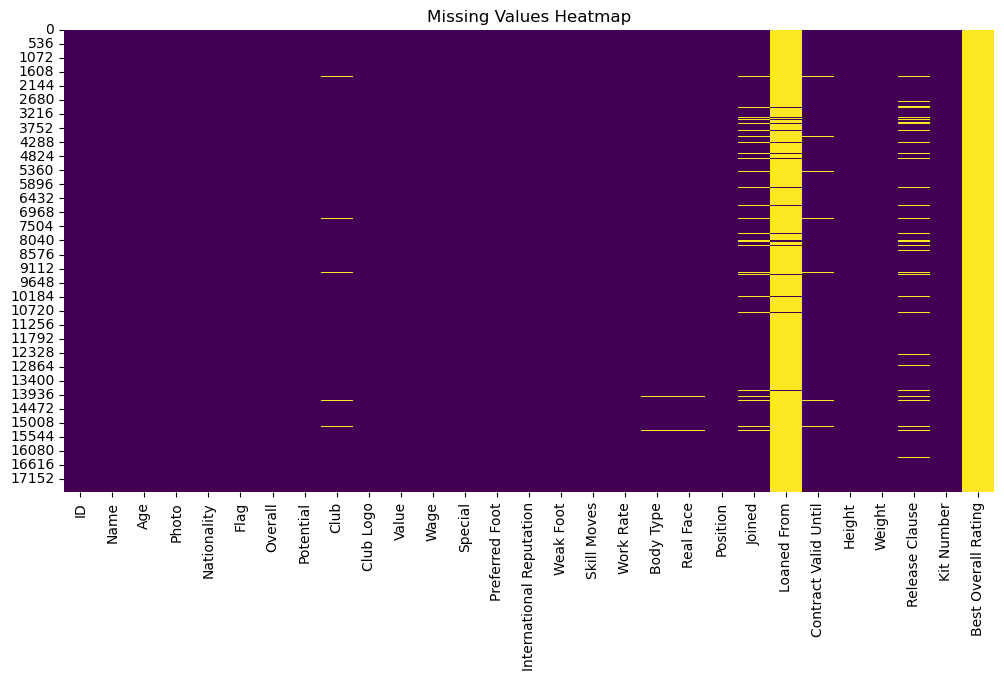

In [148]:
#heatmap of missing values shows only club has missing values of type MCAR (Missing Completely at Random)
#I want to understand the pattern of missingness, why is the data missing?
#nan values in "loaned from" column are because the player is not on loan
#nan values in "club" column are because the player is a free agent
plt.figure(figsize=(12, 6))
sns.heatmap(pandas_df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Data Cleaning

In [149]:
#dropping columns that are not useful for analysis
#these columns are images and logos links which do not add value to the analysis
col = ['Photo','Flag','Club Logo']
fifa = pandas_df.drop(columns = col, axis = 1)
fifa.shape

(17660, 26)

In [150]:
#Clean position column as it has some junk span classes data
#What is difference between position and best position?
#Convert value and wage to numeric
#What is the special column?
#Body type has easter egg values like "Messi" and "C. Ronaldo"
#Convert height and weight to numeric
#Convert work rate to categorical low, medium, high
#Convert joined date to datetime
#Find Loan Sharks from loaned from column

In [151]:
#Clean position column
import re

pattern = re.compile(r">([^<]+)$")  # capture everything between > and <

fifa["Position_clean"] = fifa["Position"].apply(
    lambda x: pattern.search(str(x)).group(1) if pd.notna(x) and pattern.search(str(x)) else None
)

print(fifa[["Position", "Position_clean"]].head(10))


                      Position Position_clean
0  <span class="pos pos28">SUB            SUB
1  <span class="pos pos15">LCM            LCM
2    <span class="pos pos7">LB             LB
3  <span class="pos pos13">RCM            RCM
4  <span class="pos pos13">RCM            RCM
5   <span class="pos pos9">RDM            RDM
6   <span class="pos pos6">LCB            LCB
7  <span class="pos pos15">LCM            LCM
8  <span class="pos pos28">SUB            SUB
9    <span class="pos pos7">LB             LB


In [152]:
#Convert value and wage to numeric
def convert(df_value):
    try:
        # If already a float or int, return as is
        if isinstance(df_value, (float, int)):
            return df_value
        # If not a string, return 0
        if not isinstance(df_value, str):
            return 0
        # Remove currency symbol and commas
        s = df_value.replace('€', '').replace(',', '').strip().upper()
        if s == '':
            return 0
        # Handle suffix
        if s[-1] == 'M':
            value = float(s[:-1]) * 1_000_000
        elif s[-1] == 'K':
            value = float(s[:-1]) * 1_000
        else:
            value = float(s)
    except Exception:
        value = 0
    return value

fifa['Value'] = fifa['Value'].apply(convert)
fifa['Wage'] = fifa['Wage'].apply(convert)
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating,Position_clean
0,209658,L. Goretzka,27,Germany,87,88,FC Bayern München,91000000.0,115000.0,2312,...,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN,SUB
1,212198,Bruno Fernandes,27,Portugal,86,87,Manchester United,78500000.0,190000.0,2305,...,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN,LCM
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,46500000.0,46000.0,2303,...,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN,LB
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,107500000.0,350000.0,2303,...,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN,RCM
4,224232,N. Barella,25,Italy,86,89,Inter,89500000.0,110000.0,2296,...,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN,RCM


In [153]:
#What is the special column?
fifa['Special'].describe()

count    17660.000000
mean      1537.915855
std        285.893809
min        749.000000
25%       1387.000000
50%       1548.000000
75%       1727.000000
max       2312.000000
Name: Special, dtype: float64

count    17660.000000
mean      1537.915855
std        285.893809
min        749.000000
25%       1387.000000
50%       1548.000000
75%       1727.000000
max       2312.000000
Name: Special, dtype: float64


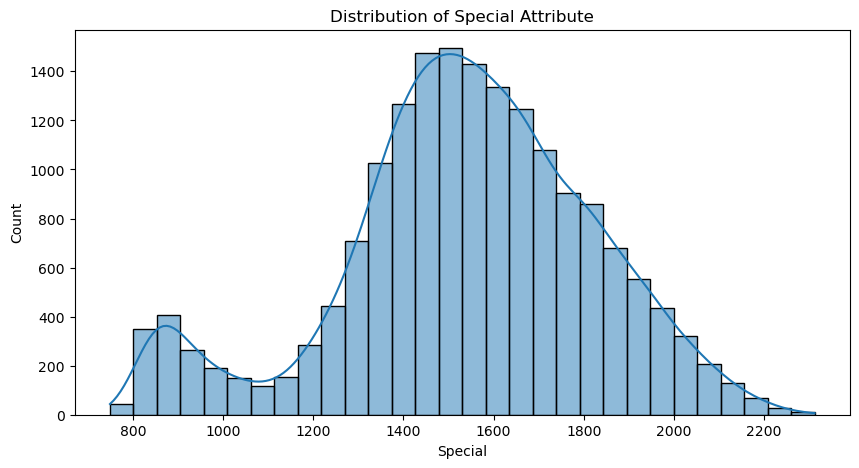

              Name  Special  Overall  Potential               Club
0      L. Goretzka     2312       87         88  FC Bayern München
1  Bruno Fernandes     2305       86         87  Manchester United
2         M. Acuña     2303       85         85         Sevilla FC
3     K. De Bruyne     2303       91         91    Manchester City
4       N. Barella     2296       86         89              Inter
5       J. Kimmich     2283       89         90  FC Bayern München
6         D. Alaba     2277       86         86     Real Madrid CF
7      22 Paulinho     2273       83         83            Al Ahli
8           E. Can     2271       82         82  Borussia Dortmund
9     João Cancelo     2262       88         88    Manchester City


In [154]:
# Summary statistics for the Special column
print(fifa['Special'].describe())

# Distribution plot for Special
plt.figure(figsize=(10,5))
sns.histplot(fifa['Special'], bins=30, kde=True)
plt.title('Distribution of Special Attribute')
plt.xlabel('Special')
plt.show()

# Top 10 players by Special
top_special = fifa.nlargest(10, 'Special')[['Name', 'Special', 'Overall', 'Potential', 'Club']]
print(top_special)

In [155]:
# Special column is a column which is just like overall but with more granularity
# It ranges from 47 to 2200 with mean of 611. It is likely a composite score based on various attributes
# It helps to differentiate players with same overall rating by providing a more detailed score

In [156]:
# Body type has easter egg values like "Messi" and "C. Ronaldo"
# Unique values in Body Type column
print(fifa['Body Type'].unique())

# Find rows with Body Type as 'Messi' or 'C. Ronaldo'
easter_eggs = fifa[fifa['Body Type'].isin(['Messi', 'C. Ronaldo', 'Shaqiri', 'Neymar', 'Akinfenwa', 'Courtois'])]
print(easter_eggs[['Name', 'Body Type', 'Overall', 'Special', 'Club']])

['Unique' 'Stocky (170-185)' 'Normal (170-)' 'Normal (170-185)'
 'Stocky (185+)' 'Lean (185+)' 'Lean (170-185)' 'Normal (185+)'
 'Lean (170-)' 'Stocky (170-)' nan]
Empty DataFrame
Columns: [Name, Body Type, Overall, Special, Club]
Index: []


In [157]:
# Clean Body Type Feature in the dataset
def clean_body_type(body_type):
    if pd.isna(body_type):
        return np.nan
    body_type = body_type.strip()
    # List of known body types including easter eggs
    known_types = [
        'Lean', 'Normal', 'Stocky', 'Muscular', 'Average',
        'Akinfenwa', 'Messi', 'C. Ronaldo', 'Shaqiri', 'Neymar', 'Courtois'
    ]
    # Extract main type before any parenthesis or space
    import re
    main_type = re.match(r'^(\w+)', body_type)
    # If body_type matches a known type, return as is
    if body_type in known_types:
        return body_type
    # If main_type is in known types, return it
    if main_type and main_type.group(1) in known_types:
        return main_type.group(1)
    # Otherwise, return main_type or original
    if main_type:
        return main_type.group(1)
    return body_type

fifa['Body Type Clean'] = fifa['Body Type'].apply(clean_body_type)
print(fifa[['Body Type Clean', 'Body Type']].value_counts())

Body Type Clean  Body Type       
Normal           Normal (170-185)    6248
Lean             Lean (170-185)      3943
Normal           Normal (185+)       3470
Lean             Lean (185+)         1841
Normal           Normal (170-)        696
Lean             Lean (170-)          525
Stocky           Stocky (170-185)     435
                 Stocky (185+)        245
Unique           Unique               133
Stocky           Stocky (170-)         86
Name: count, dtype: int64


In [158]:
fifa['Height'] = pandas_df['Height']
fifa['Weight'] = pandas_df['Weight']
print(fifa[['Height', 'Weight']].head(10))

  Height Weight
0  189cm   82kg
1  179cm   69kg
2  172cm   69kg
3  181cm   70kg
4  172cm   68kg
5  177cm   75kg
6  180cm   78kg
7  183cm   80kg
8  186cm   86kg
9  182cm   74kg


In [159]:
def height_conversion(height):
    try:
        if pd.isna(height):
            return np.nan
        # Remove spaces and handle strings like "5'9"
        height_str = str(height).replace(" ", "")
        if "'" in height_str:
            ft, inch = height_str.split("'")
            ft = float(ft)
            inch = float(inch) if inch else 0
        else:
            # If only feet provided, no inches
            ft = float(height_str)
            inch = 0
        total_cm = (ft * 12 + inch) * 2.54
        return total_cm
    except Exception:
        return np.nan

fifa['Height'] = fifa['Height'].apply(height_conversion)
fifa['Height'] = fifa['Height'].fillna(fifa['Height'].mean())
print(fifa['Height'].head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Height, dtype: float64


In [160]:
value = float(fifa['Weight'][0][0:-3])*0.453592
print('%0.2f'%value)

#in kg
def weight_conversion(weight):
    if(pd.isna(weight))!= True:
        w = int(weight[0:-3])*0.453592
        return w
    else:
        return weight

fifa['Weight'] = fifa['Weight'].apply(weight_conversion)

fifa['Weight'] = fifa['Weight'].fillna(value = fifa['Weight'].mean())

fifa['Weight'][13230:13239]

3.63


13230    3.628736
13231    3.175144
13232    3.628736
13233    3.175144
13234    2.267960
13235    2.721552
13236    2.721552
13237    3.628736
13238    3.175144
Name: Weight, dtype: float64

In [161]:
#Convert height and weight to numeric, i.e into cms and kgs respectfully
print(fifa[['Height', 'Weight']].head(10))

   Height    Weight
0     NaN  3.628736
1     NaN  2.721552
2     NaN  2.721552
3     NaN  3.175144
4     NaN  2.721552
5     NaN  3.175144
6     NaN  3.175144
7     NaN  3.628736
8     NaN  3.628736
9     NaN  3.175144


In [162]:
fifa['Joined'] = pandas_df['Joined']

In [163]:
#Convert joined date to datetime
def date_conversion(date):
    if pd.isna(date):
        return np.nan
    if isinstance(date, str):
        try:
            # Try parsing with pandas to_datetime, dayfirst for European format
            dt = pd.to_datetime(date, errors='coerce', dayfirst=True)
            if pd.isna(dt):
                # Try parsing with common formats manually
                for fmt in ['%b %d, %Y', '%d %b %Y', '%Y-%m-%d', '%d/%m/%Y', '%m/%d/%Y']:
                    try:
                        dt = pd.to_datetime(date, format=fmt, errors='coerce')
                        if not pd.isna(dt):
                            return dt
                    except Exception:
                        continue
            return dt
        except Exception:
            return np.nan
    return np.nan

fifa['Joined'] = fifa['Joined'].apply(date_conversion)
print(fifa['Joined'].head(10))

0   2018-07-01
1   2020-01-30
2   2020-09-14
3   2015-08-30
4   2020-09-01
5   2015-07-01
6   2021-07-01
7   2021-07-22
8   2020-02-18
9   2019-08-07
Name: Joined, dtype: datetime64[ns]


In [164]:
#Convert work rate to categorical low, medium, high
def work_rate_conversion(rate):
    if pd.isna(rate):
        return (np.nan, np.nan)
    if isinstance(rate, str) and '/' in rate:
        try:
            attack, defense = rate.split('/')
            return (attack.strip(), defense.strip())
        except Exception:
            return (np.nan, np.nan)
    return (np.nan, np.nan)

fifa[['Attacking Work Rate', 'Defensive Work Rate']] = fifa['Work Rate'].apply(work_rate_conversion).apply(pd.Series)
fifa[['Work Rate', 'Attacking Work Rate', 'Defensive Work Rate']].head(10)

,Work Rate,Attacking Work Rate,Defensive Work Rate
0,High/ Medium,High,Medium
1,High/ High,High,High
2,High/ High,High,High
3,High/ High,High,High
4,High/ High,High,High
5,High/ Medium,High,Medium
6,Medium/ Medium,Medium,Medium
7,High/ High,High,High
8,Medium/ High,Medium,High
9,High/ Medium,High,Medium


In [165]:
#Clean the loaned from column
import re

pattern = re.compile(r">(.*?)<")  # capture everything between > and <

fifa["Loaned From_clean"] = fifa["Loaned From"].apply(
    lambda x: pattern.search(str(x)).group(1) if pd.notna(x) and pattern.search(str(x)) else None
)

print(fifa[["Loaned From", "Loaned From_clean"]].head(10))

#it will show Nan/None for players who are not on loan
#other unique values are clubs from which players are loaned come later up in the dataset

  Loaned From Loaned From_clean
0         NaN              None
1         NaN              None
2         NaN              None
3         NaN              None
4         NaN              None
5         NaN              None
6         NaN              None
7         NaN              None
8         NaN              None
9         NaN              None


In [166]:
#Find Loan Sharks from loaned from column
fifa['Loaned From_clean'].value_counts().head(10)

Loaned From_clean
River Plate                   12
Juventus                      12
Manchester City               12
Arsenal                       12
Wolverhampton Wanderers       11
Brighton &amp; Hove Albion    11
Inter                         11
Boca Juniors                  11
U.S. Sassuolo Calcio          10
Chelsea                       10
Name: count, dtype: int64

## Final Fifa Dataset Looks like

In [167]:
# Drop Work Rate, body Type, Position, Loaned From as we cleaned them and have better dataset columns now
cols_to_drop = ['Work Rate', 'Body Type', 'Position', 'Loaned From']
fifa = fifa.drop(columns=cols_to_drop)
print(fifa.columns)

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Real Face',
       'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause',
       'Kit Number', 'Best Overall Rating', 'Position_clean',
       'Body Type Clean', 'Attacking Work Rate', 'Defensive Work Rate',
       'Loaned From_clean'],
      dtype='object')


In [168]:
fifa.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Height,Weight,Release Clause,Kit Number,Best Overall Rating,Position_clean,Body Type Clean,Attacking Work Rate,Defensive Work Rate,Loaned From_clean
0,209658,L. Goretzka,27,Germany,87,88,FC Bayern München,91000000.0,115000.0,2312,...,NaN,3.628736,€157M,8.0,NaN,SUB,Unique,High,Medium,None
1,212198,Bruno Fernandes,27,Portugal,86,87,Manchester United,78500000.0,190000.0,2305,...,NaN,2.721552,€155M,8.0,NaN,LCM,Unique,High,High,None
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,46500000.0,46000.0,2303,...,NaN,2.721552,€97.7M,19.0,NaN,LB,Stocky,High,High,None
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,107500000.0,350000.0,2303,...,NaN,3.175144,€198.9M,17.0,NaN,RCM,Unique,High,High,None
4,224232,N. Barella,25,Italy,86,89,Inter,89500000.0,110000.0,2296,...,NaN,2.721552,€154.4M,23.0,NaN,RCM,Normal,High,High,None
5,212622,J. Kimmich,27,Germany,89,90,FC Bayern München,105500000.0,130000.0,2283,...,NaN,3.175144,€182M,6.0,NaN,RDM,Normal,High,Medium,None
6,197445,D. Alaba,30,Austria,86,86,Real Madrid CF,55500000.0,220000.0,2277,...,NaN,3.175144,€113.8M,4.0,NaN,LCB,Normal,Medium,Medium,None
7,187961,22 Paulinho,32,Brazil,83,83,Al Ahli,28500000.0,61000.0,2273,...,NaN,3.628736,€48.5M,15.0,NaN,LCM,Normal,High,High,None
8,208333,E. Can,28,Germany,82,82,Borussia Dortmund,30500000.0,63000.0,2271,...,NaN,3.628736,€51.9M,23.0,NaN,SUB,Stocky,Medium,High,None
9,210514,João Cancelo,28,Portugal,88,88,Manchester City,82500000.0,250000.0,2262,...,NaN,3.175144,€152.6M,7.0,NaN,LB,Unique,High,Medium,None


In [169]:
skim(fifa)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17660  │ │ string      │ 13    │                                                          │
│ │ Number of columns │ 27     │ │ float64     │ 8     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                    All null                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                                  ┃ NA                                ┃ NA %                         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Height                                  │                             17660 │                          100 │  │
│ └─────────────────────────────────────────┴───────────────────────────────────┴──────────────────────────────┘  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column      ┃ NA ┃ NA %       ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ ID          │  0 │          0 │  246300 │   31490 │    16 │ 240700 │ 257000 │  263000 │    271300 │     ▁▇ │  │
│ │ Age         │  0 │          0 │   23.13 │    4.64 │    15 │     20 │     22 │      26 │        54 │  ▇▆▃   │  │
│ │ Overall     │  0 │          0 │   63.37 │   8.036 │    43 │     58 │     63 │      69 │        91 │ ▁▅▇▅▂  │  │
│ │ Potential   │  0 │          0 │   70.98 │    6.53 │    42 │     67 │     71 │      75 │        95 │  ▁▅▇▃  │  │
│ │ Value       │  0 │          0 │ 2740000 │ 7841000 │     0 │ 325000 │ 700000 │ 1725000 │ 190500000 │   ▇    │  │
│ │ Wage        │  0 │          0 │    8190 │   20480 │     0 │    550 │   2000 │    6000 │    450000 │   ▇    │  │
│ │ Special     │  0 │          0 │    1538 │   285.9 │   749 │   1387 │   1548 │    1727 │      2312 │ ▂▂▇▇▃▁ │  │
│ │ Internation │  0 │          0 │   1.106 │   0.407 │     1 │      1 │      1 │       1 │         5 │   ▇    │  │
│ │ al          │    │            │         │         │       │        │        │         │           │        │  │
│ │ Reputation  │    │            │         │         │       │        │        │         │           │        │  │
│ │ Weak Foot   │  0 │          0 │     2.9 │  0.6635 │     1 │      3 │      3 │       3 │         5 │  ▃ ▇▂  │  │
│ │ Skill Moves │  0 │          0 │   2.297 │  0.7543 │     1 │      2 │      2 │       3 │         5 │ ▂▇ ▅▁  │  │
│ │ Weight      │  0 │          0 │    3.18 │  0.3385 │ 1.814 │  3.175 │  3.175 │   3.175 │      4.99 │   ▃▇▃  │  │
│ │ Kit Number  │ 35 │ 0.19818799 │   25.04 │   19.15 │     1 │     11 │     22 │      32 │        99 │ ▇▇▃▁ ▁ │  │
│ │             │    │  546998866 │         │         │ 

## Graphs(temp)

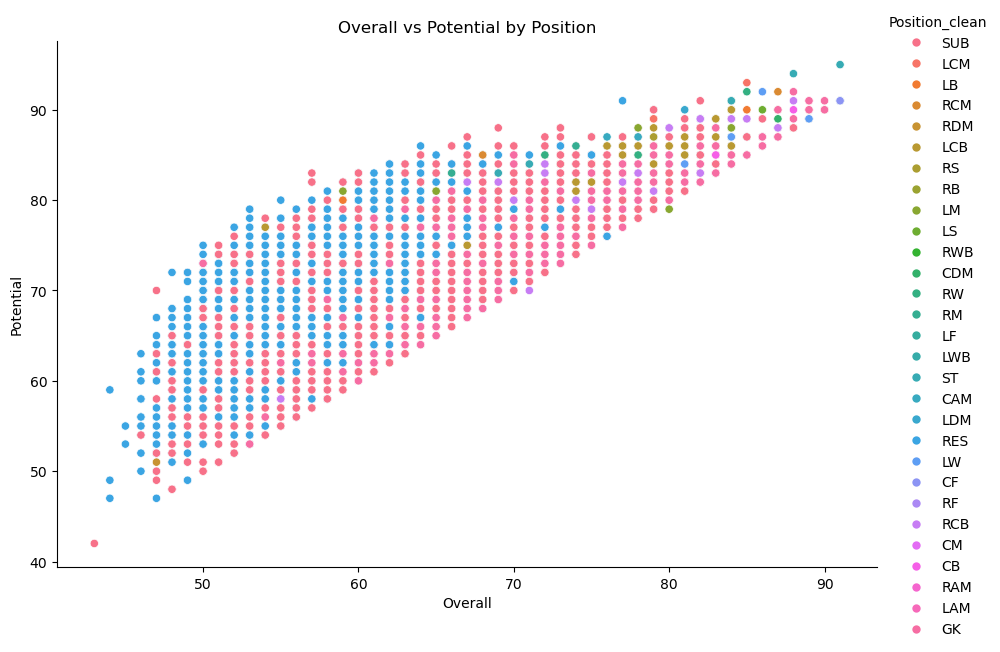

In [170]:
sns.relplot(data=fifa, x='Overall', y='Potential', hue='Position_clean', kind='scatter', height=6, aspect=1.5)
plt.title('Overall vs Potential by Position')
plt.show()

In [171]:
#highest potential players
top_potential = pandas_df.nlargest(10, 'Potential')[['Name', 'Overall', 'Potential', 'Club', 'Wage']]
print("Top 10 Players by Potential:")
print(top_potential)

Top 10 Players by Potential:
                 Name  Overall  Potential                 Club   Wage
75          K. Mbappé       91         95  Paris Saint-Germain  €230K
180        E. Haaland       88         94      Manchester City  €220K
214             Pedri       85         93         FC Barcelona  €115K
17         F. de Jong       87         92         FC Barcelona  €230K
317          P. Foden       85         92      Manchester City  €180K
849      Vinícius Jr.       86         92       Real Madrid CF  €200K
13506   G. Donnarumma       88         92  Paris Saint-Germain  €110K
3        K. De Bruyne       91         91      Manchester City  €350K
41     R. Lewandowski       91         91         FC Barcelona  €420K
56           L. Messi       91         91  Paris Saint-Germain  €195K


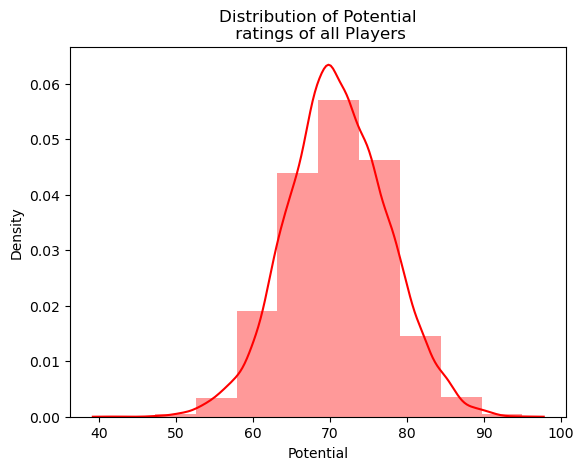

In [172]:
# Distribution of Potential ratings
sns.distplot(fifa['Potential'], bins=10, color='r')
plt.title("Distribution of Potential\n ratings of all Players")
plt.savefig("Distribution.png")
plt.show()

In [173]:
#highest overall players
top_overall = pandas_df.nlargest(10, 'Overall')[['Name', 'Overall', 'Potential', 'Club', 'Wage']]
print("Top 10 Players by Overall:")
print(top_overall)

Top 10 Players by Overall:
                    Name  Overall  Potential                 Club   Wage
3           K. De Bruyne       91         91      Manchester City  €350K
41        R. Lewandowski       91         91         FC Barcelona  €420K
56              L. Messi       91         91  Paris Saint-Germain  €195K
75             K. Mbappé       91         95  Paris Saint-Germain  €230K
124           K. Benzema       91         91       Real Madrid CF  €450K
25              M. Salah       90         90            Liverpool  €270K
100    Cristiano Ronaldo       90         90    Manchester United  €220K
192          V. van Dijk       90         90            Liverpool  €230K
9151            M. Neuer       90         90    FC Bayern München   €72K
14357        T. Courtois       90         91       Real Madrid CF  €250K


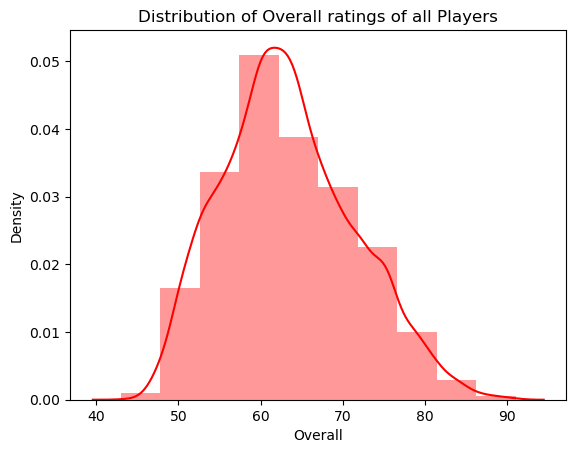

In [174]:
# Distribution of Overall ratings
sns.distplot(fifa['Overall'], bins=10, color='r')
plt.title("Distribution of Overall ratings of all Players")
plt.savefig("Distribution.png")
plt.show()

In [175]:
# Save the final dataframe to a CSV file
fifa.to_csv('fifa_dataset_cleaned/fifa_final23.csv', index=False)